## Importamos las librerías que necesitaremos

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Cargamos el data frame que vamos a estar trabajando

In [2]:
df_original = pd.read_csv("country_vaccinations.csv", parse_dates=["date"])
df_original.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5457 entries, 0 to 5456
Data columns (total 15 columns):
country                                5457 non-null object
iso_code                               5121 non-null object
date                                   5457 non-null datetime64[ns]
total_vaccinations                     3445 non-null float64
people_vaccinated                      3046 non-null float64
people_fully_vaccinated                2075 non-null float64
daily_vaccinations_raw                 2890 non-null float64
daily_vaccinations                     5269 non-null float64
total_vaccinations_per_hundred         3445 non-null float64
people_vaccinated_per_hundred          3046 non-null float64
people_fully_vaccinated_per_hundred    2075 non-null float64
daily_vaccinations_per_million         5269 non-null float64
vaccines                               5457 non-null object
source_name                            5457 non-null object
source_website                      

Notamos que el país y la fecha no tienen entradas faltantes, y son ideales para usarlos como identificador de nuestra entrada. Así que procedemos a ponerlos como índice. Adicionalmente, para el estudio que realizaremos, asumiremos que los datos son correctos (siempre que no haya evidencia de lo contrario), así que para el análisis, nos desharemos de las últimas dos columnas. Por último, notamos que hay muchos datos faltantes en algunas columnas y muchos datos que en teoría dependen de otros datos, así que deberíamos realizar algunas validaciones. 


In [4]:
df = df_original.set_index(["country", "date"], drop=False).drop(["source_name","source_website", "iso_code"], axis=1)
df.head()

country       date  total_vaccinations  people_vaccinated  \
country date                                                                    
Albania 2021-01-10  Albania 2021-01-10                 0.0                0.0   
        2021-01-11  Albania 2021-01-11                 NaN                NaN   
        2021-01-12  Albania 2021-01-12               128.0              128.0   
        2021-01-13  Albania 2021-01-13               188.0              188.0   
        2021-01-14  Albania 2021-01-14               266.0              266.0   

                    people_fully_vaccinated  daily_vaccinations_raw  \
country date                                                          
Albania 2021-01-10                      NaN                     NaN   
        2021-01-11                      NaN                     NaN   
        2021-01-12                      NaN                     NaN   
        2021-01-13                      NaN                    60.0   
        2021-01-14                      NaN                    78.0   

                    daily_vaccinations  total_vaccinations_per_hundred  \
country date                                                             
Albania 2021-01-10                 NaN                            0.00   
        2021-01-11                64.0                             NaN   
        2021-01-12                64.0                            0.00   
        2021-01-13                63.0                            0.01   
        2021-01-14                66.0                            0.01   

                    people_vaccinated_per_hundred  \
country date                                        
Albania 2021-01-10                           0.00   
        2021-01-11                            NaN   
        2021-01-12                           0.00   
        2021-01-13                           0.01   
        2021-01-14                           0.01   

                    people_fully_vaccinated_per_hundred  \
country date                                              
Albania 2021-01-10                                  NaN   
        2021-01-11                                  NaN   
        2021-01-12                                  NaN   
        2021-01-13                                  NaN   
        2021-01-14                                  NaN   

                    daily_vaccinations_per_million         vaccines  
country date                                                         
Albania 2021-01-10                             NaN  Pfizer/BioNTech  
        2021-01-11                            22.0  Pfizer/BioNTech  
        2021-01-12                            22.0  Pfizer/BioNTech  
        2021-01-13                            22.0  Pfizer/BioNTech  
        2021-01-14                            23.0  Pfizer/BioNTech

### Validaciones

In [5]:
#total_vaccinations es el número de vacunas administradas, 
#mientras que people_vaccinated es el número total de personas vacunadas 
#(estos números pueden diferir porque hay )
cond = df["total_vaccinations"] == df["people_vaccinated"]
display(df[~cond & ~df["total_vaccinations"].isna()].head())

cond = df["total_vaccinations"] < df["people_vaccinated"]
display(df[cond].head()) 

country       date  total_vaccinations  people_vaccinated  \
country date                                                                    
Albania 2021-02-02  Albania 2021-02-02               550.0              549.0   
        2021-02-09  Albania 2021-02-09              1127.0              689.0   
        2021-02-17  Albania 2021-02-17              1701.0             1090.0   
        2021-02-18  Albania 2021-02-18              3049.0             2438.0   
        2021-02-19  Albania 2021-02-19              4177.0                NaN   

                    people_fully_vaccinated  daily_vaccinations_raw  \
country date                                                          
Albania 2021-02-02                      1.0                     NaN   
        2021-02-09                    438.0                     NaN   
        2021-02-17                    611.0                     NaN   
        2021-02-18                    611.0                  1348.0   
        2021-02-19                      NaN                  1128.0   

                    daily_vaccinations  total_vaccinations_per_hundred  \
country date                                                             
Albania 2021-02-02                 NaN                            0.02   
        2021-02-09                82.0                            0.04   
        2021-02-17                72.0                            0.06   
        2021-02-18               254.0                            0.11   
        2021-02-19               405.0                            0.15   

                    people_vaccinated_per_hundred  \
country date                                        
Albania 2021-02-02                           0.02   
        2021-02-09                           0.02   
        2021-02-17                           0.04   
        2021-02-18                           0.08   
        2021-02-19                            NaN   

                    people_fully_vaccinated_per_hundred  \
country date                                              
Albania 2021-02-02                                 0.00   
        2021-02-09                                 0.02   
        2021-02-17                                 0.02   
        2021-02-18                                 0.02   
        2021-02-19                                  NaN   

                    daily_vaccinations_per_million         vaccines  
country date                                                         
Albania 2021-02-02                             NaN  Pfizer/BioNTech  
        2021-02-09                            28.0  Pfizer/BioNTech  
        2021-02-17                            25.0  Pfizer/BioNTech  
        2021-02-18                            88.0  Pfizer/BioNTech  
        2021-02-19                           141.0  Pfizer/BioNTech

,,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
country,date,,,,,,,,,,,,


Continuaremos viendo cuantos son los países y cuántos/cuales son los tipos de vacunas en el data frame. 

In [6]:
countries = list(df.index.get_level_values(0).unique())
print(f"Hay {len(countries)} paises distintos")

Hay 129 paises distintos


In [7]:
vaccines = list(df["vaccines"].unique())
vaccines[0:5]

['Pfizer/BioNTech',
 'Sputnik V',
 'Oxford/AstraZeneca',
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
 'Oxford/AstraZeneca, Sputnik V']

Notemos que cada país puede tener más de una vacuna, por ejemplo 
$\texttt{vacines[3]}$: 


In [8]:
vaccines[3]

'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'

Las vacunas están divididas por comas, así que las contaremos de otra forma

In [9]:
vaccines1 = []
for lis in pd.Series(vaccines).str.split(","):
    vaccines1.extend(lis)

In [10]:
vaccines = pd.Series(vaccines1).str.strip().unique()
print(f"Hay {len(vaccines)} vacunas diferentes:")
print(vaccines)

Hay 10 vacunas diferentes:
['Pfizer/BioNTech' 'Sputnik V' 'Oxford/AstraZeneca' 'Moderna'
 'Sinopharm/Beijing' 'Sinovac' 'Sinopharm/Wuhan' 'Covaxin' 'EpiVacCorona'
 'Johnson&Johnson']


## Análisis exploratorio de datos(EDA)

Para comenzar, graficaremos el total de vacunaciones ($\texttt{total\-vaccinations}$) que ha habido en el tiempo por país. Para esto rellenaremos los valores faltantes con el valor inmediato anterior (forward fill). También hay que considerar que si hacemos una gráfica para cada país, sobrepoblaríamos la gráfica, entonces tomaremos un sample de 20 países. 



In [11]:
cols_to_fill = ["total_vaccinations", "people_vaccinated", "total_vaccinations_per_hundred"]  
df.loc[:, cols_to_fill].fillna(method="ffill", inplace=True)


In [12]:
countries_to_plot = pd.Series(countries).sample(20)
samples_bool = df.index.get_level_values("country").isin(countries_to_plot)
df_to_plot = df[samples_bool]

C:\Users\ealjk\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


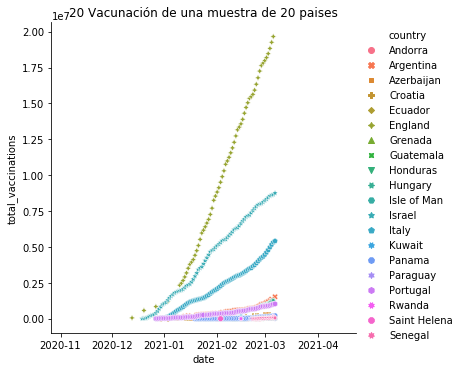

In [13]:
x = sns.relplot(data=df_to_plot, x="date", y="total_vaccinations", hue="country", style="country")
plt.title("20 Vacunación de una muestra de 20 paises");
#

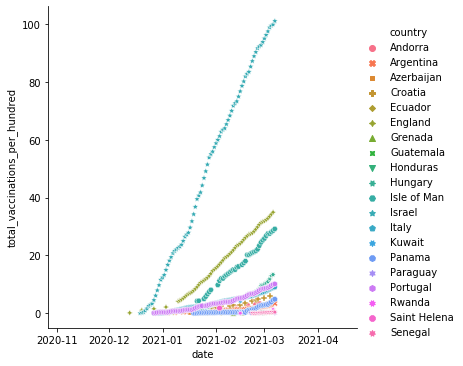

In [14]:
x = sns.relplot(data=df_to_plot, x="date", y="total_vaccinations_per_hundred", hue="country", style="country")


Veremos cómo está méxico respecto a otros paises al empezar a vacunar. Comenzaremos analizando las primeras fechas de vacunación. 

In [15]:
first_dates_per_country = df_original.groupby("country")["date"].min()
last_dates_per_country = df_original.groupby("country")["date"].max()
mex_first_date = first_dates_per_country["Mexico"]
str_mex_first_date = mex_first_date.strftime("%Y-%m-%d")
before_mex = len(first_dates_per_country[first_dates_per_country < first_dates_per_country["Mexico"]])
after_mex =len(first_dates_per_country[first_dates_per_country >= first_dates_per_country["Mexico"]])
print(f"México empezó a administrar vacunas en la fecha {str_mex_first_date} (yyyy-mm-dd).")
print(f"{before_mex} paises empezaron a vacunar antes de méxico y {after_mex} paises empezaron a vacunar después de méxico.")

México empezó a administrar vacunas en la fecha 2020-12-24 (yyyy-mm-dd).
12 paises empezaron a vacunar antes de méxico y 117 paises empezaron a vacunar después de méxico.


In [16]:
time_per_country = (last_dates_per_country - first_dates_per_country)

total_vaccines  =  df_original.groupby("country")["total_vaccinations"].max()
avg_total_vaccines_per_day = total_vaccines/(time_per_country.dt.days + 1)

total_vaccines_per_hundred = df_original.groupby("country")["total_vaccinations_per_hundred"].max()
avg_total_vaccines_hundred_per_day = total_vaccines_per_hundred/(time_per_country.dt.days + 1)

Ahora, realizaremos un pequeño análisis acerca de los promedios diarios de vacunación, tanto en términos absoultos como relativos (por cada 100 personas).

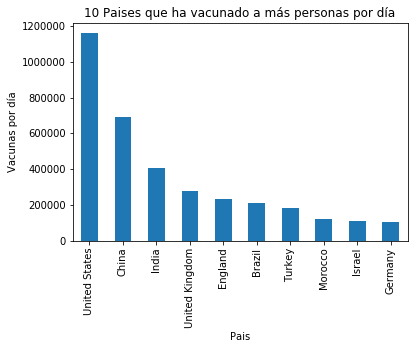

In [17]:
avg_total_vaccines_per_day.sort_values(ascending=False).head(10).plot(kind="bar")
plt.xlabel("Pais")
plt.ylabel("Vacunas por día")
plt.title("10 Paises que ha vacunado a más personas por día")
plt.show()

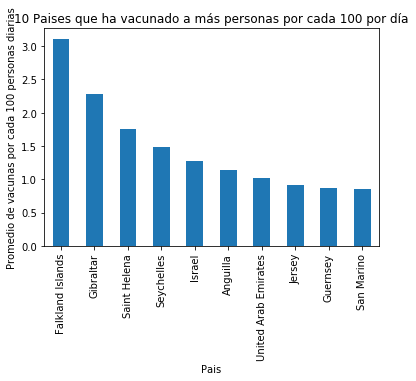

In [18]:
avg_total_vaccines_hundred_per_day.sort_values(ascending=False).head(10).plot(kind="bar")
plt.xlabel("Pais")
plt.ylabel("Promedio de vacunas por cada 100 personas diarias")
plt.title("10 Paises que ha vacunado a más personas por cada 100 por día")
plt.show()

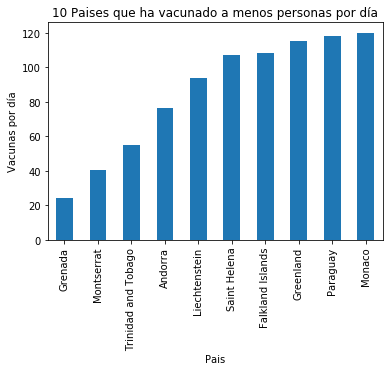

In [19]:
avg_total_vaccines_per_day.sort_values().head(10).plot(kind="bar")
plt.xlabel("Pais")
plt.ylabel("Vacunas por día")
plt.title("10 Paises que ha vacunado a menos personas por día")
plt.show()

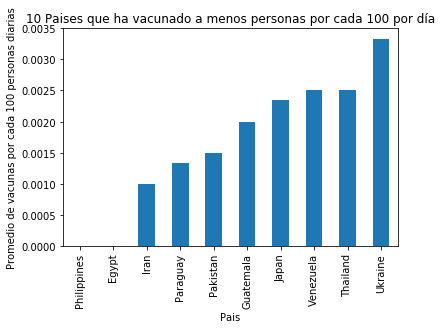

In [20]:
data = avg_total_vaccines_hundred_per_day.sort_values().head(10).plot(kind="bar")
plt.xlabel("Pais")
plt.ylabel("Promedio de vacunas por cada 100 personas diarias")
plt.title("10 Paises que ha vacunado a menos personas por cada 100 por día")
plt.show()

In [21]:
avg_total_vaccines_per_day_mex = avg_total_vaccines_per_day["Mexico"]
avg_total_vaccines_hundred_per_day_mex = avg_total_vaccines_hundred_per_day["Mexico"]
print(f"México administra {avg_total_vaccines_per_day_mex} en promedio por día")
print(f"México administra {avg_total_vaccines_hundred_per_day_mex} en promedio por día por cada 100 personas")

cond1 = avg_total_vaccines_per_day.sort_values(ascending=False) > avg_total_vaccines_per_day_mex
num1 = len(avg_total_vaccines_per_day[cond1])
print(f"En términos absoultos, México se encunetra en el lugar número {num1}/{len(countries)}")

cond2 = avg_total_vaccines_hundred_per_day.sort_values(ascending=False) > avg_total_vaccines_hundred_per_day_mex
num2 = len(avg_total_vaccines_hundred_per_day[cond2])
print(f"En términos relativos, México se encuentra en el lugar número {num2}/{len(countries)}")

México administra 37744.67567567567 en promedio por día
México administra 0.029324324324324323 en promedio por día por cada 100 personas
En términos absoultos, México se encunetra en el lugar número 19/129
En términos relativos, México se encuentra en el lugar número 94/129


Por último, veremos qué vacunas han tenido más alcance al rededor del mundo. 

In [22]:
vacc_dict = {}
for vacc in vaccines:
    grouped = df["vaccines"].groupby("country").sum()
    vacc_dict[vacc] = len(grouped[grouped.str.contains(vacc)])

In [23]:
df_vacc = pd.DataFrame(list(vacc_dict.items()),columns = ['Vacuna', 'Cantidad'])
df_vacc

,Vacuna,Cantidad
0,Pfizer/BioNTech,74
1,Sputnik V,18
2,Oxford/AstraZeneca,66
3,Moderna,30
4,Sinopharm/Beijing,16
5,Sinovac,13
6,Sinopharm/Wuhan,2
7,Covaxin,1
8,EpiVacCorona,1
9,Johnson&Johnson,1


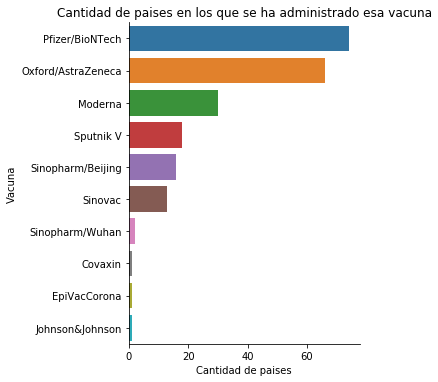

In [24]:
sns.catplot(data=df_vacc.sort_values("Cantidad", ascending=False), x ="Cantidad", y="Vacuna", kind="bar")
plt.title("Cantidad de paises en los que se ha administrado esa vacuna")
plt.xlabel("Cantidad de paises")
plt.show()

La vacuna Pfizer/BioNTech es la que se ha administrado en más paises del mundo (74 países) y empatadas en último lugar, las vacunas que se han administrado en menos lugares del mundo han sido: Covaxin, EpiVacCorona y Johnson&Johnson. 